<a href="https://colab.research.google.com/github/KeeratKK/Goku-Multiclass-Image-Classification/blob/main/GokuDataset_Image_Class_First_Attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import glob
import shutil

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
base_dir = '/content/gdrive/MyDrive/GokuDataset'
classes = ['Form0', 'Form1', 'Form2']

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img

img_path = os.path.join(base_dir, classes[0])
images = glob.glob(img_path + '/*jpg')

image = tf.io.read_file(images[0])
image = tf.io.decode_jpeg(image, channels=3)
image = tf.image.convert_image_dtype(image, tf.float32)
image = tf.image.resize_with_pad(image, 200, 200)
image = array_to_img(image)


(<PIL.Image.Image image mode=RGB size=200x200 at 0x7F546FB79EB0>,
 '/content/gdrive/MyDrive/GokuDataset/Form0/174.jpg')

In [ ]:

for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

Form0: 0 Images
Form1: 0 Images
Form2: 0 Images


In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')


In [ ]:
batch_size = 30
IMG_SHAPE = 200

image_gen_train = ImageDataGenerator(rescale=1./255,
                               rotation_range=45,
                               zoom_range=0.5,
                               horizontal_flip=True,
                               width_shift_range=0.20,
                               height_shift_range=0.20)
train_data_gen = image_gen_train.flow_from_directory(batch_size = batch_size,
                                                     directory = train_dir,
                                                     target_size = (IMG_SHAPE, IMG_SHAPE),
                                                     shuffle=True,
                                                     class_mode = 'sparse')

Found 730 images belonging to 3 classes.


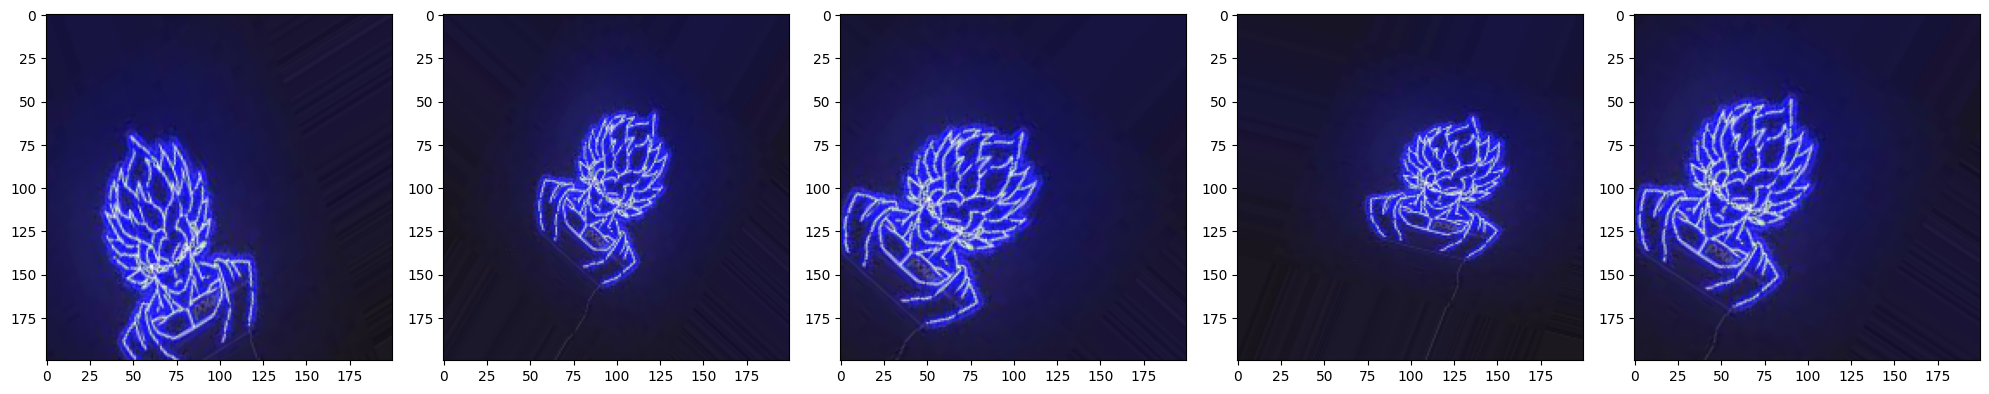

In [ ]:
augmented_images=[train_data_gen[0][0][3] for i in range(5)]

def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip( images_arr, axes):
      ax.imshow(img)
  plt.tight_layout()
  plt.show()

plotImages(augmented_images)

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size = batch_size,
                                                 directory = val_dir,
                                                 target_size = (IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 182 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3)
])

In [ ]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 80

history = model.fit_generator(train_data_gen,
                              steps_per_epoch=int(np.ceil(train_data_gen.n/float(batch_size))),
                              epochs = epochs,
                              validation_data = val_data_gen,
                              validation_steps=int(np.ceil(val_data_gen.n / float(batch_size))))

<ipython-input-19-98966d61faab>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data_gen,


Epoch 1/80
25/25 [==============================] - 26s 852ms/step - loss: 1.4643 - accuracy: 0.4014 - val_loss: 1.0098 - val_accuracy: 0.4615
Epoch 2/80
25/25 [==============================] - 21s 843ms/step - loss: 1.0015 - accuracy: 0.5027 - val_loss: 0.8232 - val_accuracy: 0.6209
Epoch 3/80
25/25 [==============================] - 22s 874ms/step - loss: 0.9874 - accuracy: 0.5096 - val_loss: 0.7688 - val_accuracy: 0.5824
Epoch 4/80
25/25 [==============================] - 21s 846ms/step - loss: 0.9419 - accuracy: 0.5178 - val_loss: 0.7843 - val_accuracy: 0.6374
Epoch 5/80
25/25 [==============================] - 20s 784ms/step - loss: 0.9497 - accuracy: 0.5274 - val_loss: 0.7499 - val_accuracy: 0.6484
Epoch 6/80
25/25 [==============================] - 21s 845ms/step - loss: 0.9002 - accuracy: 0.5548 - val_loss: 0.7415 - val_accuracy: 0.6429
Epoch 7/80
25/25 [==============================] - 20s 796ms/step - loss: 0.9252 - accuracy: 0.5288 - val_loss: 0.7744 - val_accuracy: 0.6593

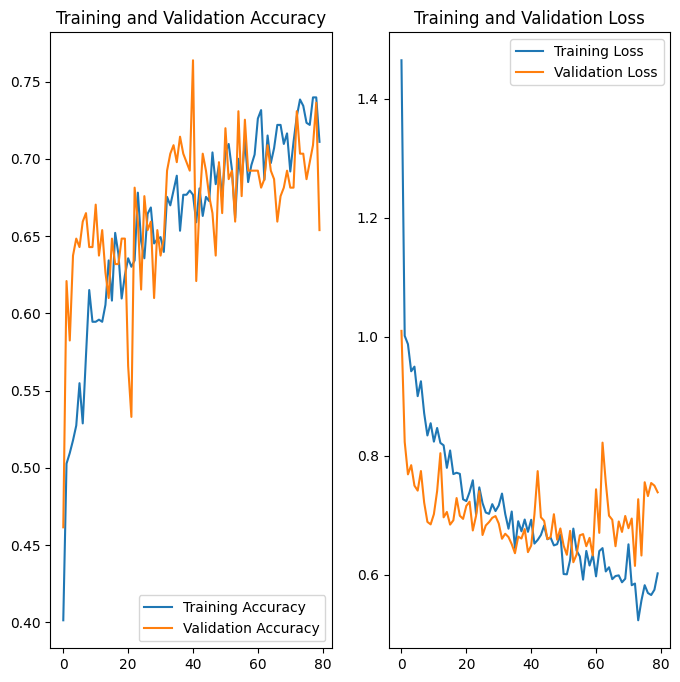

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import cv2

img = cv2.imread('/content/gdrive/MyDrive/GokuDataset/test/test1.png')

In [ ]:
img = cv2.resize(img, (200, 200))
img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

In [ ]:
img = np.random.randint(0, 10, (200,200,3))
img = np.expand_dims(img, axis=0)
img.shape

(1, 200, 200, 3)

In [ ]:
predictions = model.predict(val_data_gen)

7/7 [==============================] - 2s 264ms/step


In [ ]:
predictions.shape
predictions_true_cl = val_data_gen.classes

In [ ]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


In [ ]:
predictions_true_cl[181]

2

In [ ]:
x = predictions[:3]
y = predictions_true_cl[:3]

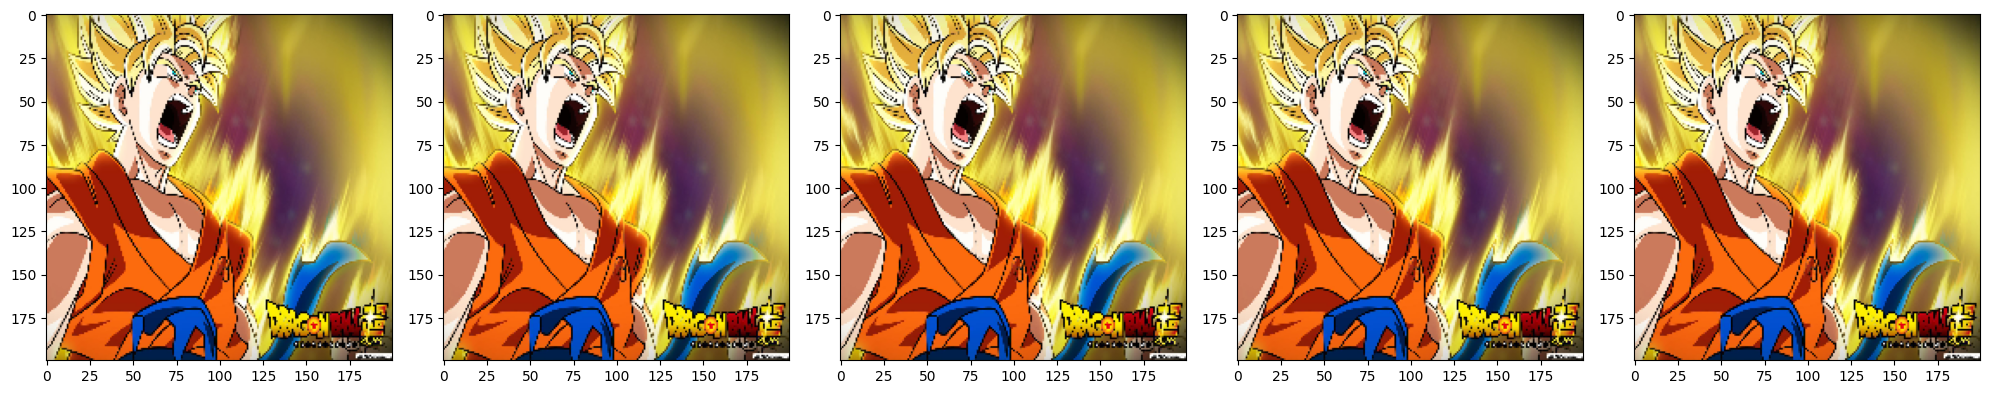

In [ ]:
plotImages(val_data_gen[0][0][0] for i in range(5))

In [ ]:
val_data_gen = image_gen_val.flow_from_directory(batch_size = batch_size,
                                                 directory = val_dir,
                                                 target_size = (IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 182 images belonging to 3 classes.


In [ ]:
X, y = val_data_gen.next()
predictions = model.predict(X)

1/1 [==============================] - 0s 84ms/step


Predicted: 1, Actual: 1.0


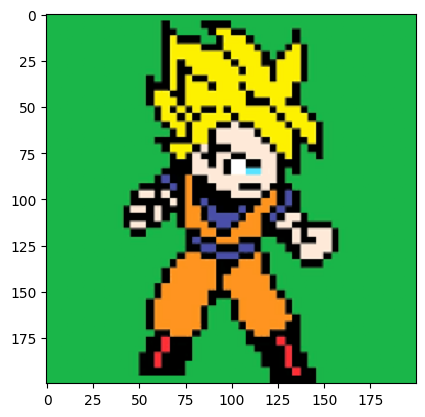

In [ ]:
i = 29
plt.imshow(X[i])
print("Predicted: {}, Actual: {}".format(np.argmax(predictions[i]), y[i]))

In [ ]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
test_dir = os.path.join(base_dir, 'test')

In [ ]:
img_test = ImageDataGenerator(rescale=1./255)
image_test_gen = img_test.flow_from_directory(batch_size = 2,
                                              directory = test_dir,
                                              target_size = (IMG_SHAPE, IMG_SHAPE),
                                              class_mode = 'sparse')

Found 2 images belonging to 3 classes.


In [ ]:
X, y = image_test_gen.next()
test_preds = model.predict(X)

1/1 [==============================] - 0s 32ms/step


In [ ]:
def show_preds(i, test_preds, X, y):
  plt.imshow(X[i])
  print("Predicted: {}, Actual: {}".format(np.argmax(predictions[i]), y[i]))

In [ ]:
show_preds(1, test_preds, X, y)